# Graded Challenge 4 | Phase 1 | Week 1

## 1. Perkenalan

Nama = Muhammad Ashar Ihsa

Batch = 035

Dataset = [House_Price](house-price-v2.csv)

Objective = Kita merupakan seorang data scientist dari perusahaan penjualan rumah, dimana kita akan memprediksi harga yang pas agar penjualan kita dapat lebih sukses lagi.

## 2. Import Libraries

In [1]:
# import semua library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import json
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
import pickle

## 3. Data Loading

Sebelum data dapat kita olah, kita akan menyimpan data asli didalam satu variabel untuk berjaga-jaga. setelah itu kita buat copy dari dataset tersebut ke variabel yang lain.

In [201]:
# simpan ke variabel
df_ori = pd.read_csv("house-price-v2.csv")

# copy ke variabel lain
df = df_ori.copy()

df


,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,2.990000e+09
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200 mah,6.0,2016.0,bagus,0,1,1.270000e+09
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,2021.0,bagus,1,1,1.950000e+09
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,6.0,2016.0,bagus sekali,1,0,3.300000e+09
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,9.0,2013.0,bagus,1,1,4.500000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,1,1,5.880000e+08
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,0,1,7.850000e+08
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,0,1,7.550000e+08
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,0.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,2022.0,baru,0,1,8.000000e+08


Kita sudah berhasil membuka dataset yang kita punya ke dalam bentuk dataframe. Next, kita akan melihat datanya lebih lanjut.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            3034 non-null   object 
 1   city            3034 non-null   object 
 2   lattitude       3034 non-null   float64
 3   logitude        3034 non-null   float64
 4   property_type   3034 non-null   object 
 5   bedrooms        3007 non-null   float64
 6   bathrooms       3012 non-null   float64
 7   land_area       3034 non-null   float64
 8   building_area   3034 non-null   float64
 9   floors          3033 non-null   float64
 10  maid_bedrooms   3034 non-null   float64
 11  maid_bathrooms  3034 non-null   float64
 12  certificate     2937 non-null   object 
 13  voltage         3034 non-null   object 
 14  building_age    3034 non-null   float64
 15  year            3034 non-null   float64
 16  condition       3034 non-null   object 
 17  garage          3034 non-null   i

Yang bisa kita ambil dari info diatas:
- Terdapat 20 columns yang terdiri dari:
    - 6 column object
    - 14 column numeric

- Terdapat 3033 row yang ada di dataframe.
- Ada column Year yang bertipe float seharusnya datetime

In [203]:
# kia coba ngubah tipe data year menjadi datetime
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

# kita ambil tahunnya saja
df['year'] = df['year'].dt.year

# Cek hasil perubahan
print(df[['year']].head())

   year
0  2017
1  2016
2  2021
3  2016
4  2013


In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lattitude,3034.0,-6.325994e+00,1.274042e-01,-6.894828e+00,-6.399113e+00,-6.300733e+00,-6.236815e+00,-6.102478e+00
logitude,3034.0,1.067921e+02,1.691169e-01,1.064023e+02,1.066873e+02,1.068011e+02,1.068748e+02,1.097717e+02
bedrooms,3007.0,3.230462e+00,1.874585e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.700000e+01
bathrooms,3012.0,2.533201e+00,1.961069e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,5.700000e+01
land_area,3034.0,1.880188e+02,3.515791e+02,1.200000e+01,7.200000e+01,1.050000e+02,1.800000e+02,8.000000e+03
building_area,3034.0,1.750277e+02,2.039792e+02,1.800000e+01,6.300000e+01,1.080000e+02,2.000000e+02,3.000000e+03
floors,3033.0,1.751401e+00,6.255753e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
maid_bedrooms,3034.0,4.878049e-01,6.656889e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
maid_bathrooms,3034.0,3.754120e-01,5.335453e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
building_age,3034.0,4.201055e+00,5.519123e+00,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00,5.200000e+01


Terlihat diatas data-data seperti rata-rata, nilai minimum , nilai maksimum dari tiap column yang kita punya. Kita lihat diatas column price memiliki nilai minimum -+ 420 juta dengan maksimum -+ 5,8 Triliun dan juga Rata-rata harga rumah yang ada di dataframe -+ 38 milliar.

In [205]:
df.duplicated().sum()

183

Diatas kita cek apakah ada duplikasi pada data kita, ternyata terdapat 183 row yang terduplikasi.

In [206]:
df = df.drop_duplicates()

df.duplicated().sum()

0

Bisa kita lihat setelah kita melakukan pembersihan, data yang terduplikasi menjadi 0

In [207]:
df.columns

Index(['area', 'city', 'lattitude', 'logitude', 'property_type', 'bedrooms',
       'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms',
       'maid_bathrooms', 'certificate', 'voltage', 'building_age', 'year',
       'condition', 'garage', 'carport', 'price'],
      dtype='object')

Pengecekan terakhir sebelum masuk ke EDA, terlihat ada 20 columns dari judulnya cukup bersih tidak ada whitespace. Jika dilihat dari objective kita bisa diperkirakan bahwa column target kita ialah price.

In [208]:
df.isnull().sum()

area               0
city               0
lattitude          0
logitude           0
property_type      0
bedrooms          26
bathrooms         21
land_area          0
building_area      0
floors             1
maid_bedrooms      0
maid_bathrooms     0
certificate       95
voltage            0
building_age       0
year               0
condition          0
garage             0
carport            0
price              0
dtype: int64

Terlihat datas setelah kita melakukan pengecekan missing value, ternyata ada tiga kolom yang terdeteksi missing value. kita akan membersihkannya pada bagian feature engineering dibawah nanti.

## 4. EDA

Pertama yang dilakukan pada tahap EDA ialah menjawab soal yang ditugaskan untuk kita. Untuk instruksi pertama ialah membagi golongan daya listrik rumah menjadi 3 bagian.

In [209]:
df["voltage"]

0       4400 mah
1       2200 mah
2       2200 mah
3       3500 mah
4       3500 mah
          ...   
3029    1300 mah
3030    1300 mah
3031    1300 mah
3032    2200 mah
3033    1300 mah
Name: voltage, Length: 2851, dtype: object

Terlihat tipe data column voltage merupakan object, jadi kita akan mengubahnya dulu ke numeric untuk bisa kita golongkan.

In [210]:
# buat function untuk ngebersiin dan ngeconvert datanya jadi integer
def bersihin_volt(value):
    try:
        return int(value.split()[0])
    except:
        return None
    
# gunakan function tadi ke column voltage
df['voltage_VA'] = df['voltage'].apply(bersihin_volt)

# selanjutnya kita membuat fuction untuk membagi menjadi 3 golongan dan yang tidak masuk ke golongan tersebut kita kalsifikasikan sebagai other
def golongan_voltage(voltage):
    if voltage is None:
        return None
    elif 450 <= voltage <= 2200:
        return 'Golongan R-1'
    elif 3300 <= voltage <= 5500:
        return 'Golongan R-2'
    elif voltage >= 6600:
        return 'Golongan R-3'
    else:
        return 'Other'

# setelah itu, kita masukkan column golongan ini ke dalam df kita
df['voltage_class'] = df['voltage_VA'].apply(golongan_voltage)

# kita lihat banyaknya tiap golongan yang ada di data kita
voltage_counts = df['voltage_class'].value_counts()

voltage_counts


C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_7768\3515882937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voltage_VA'] = df['voltage'].apply(bersihin_volt)
C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_7768\3515882937.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voltage_class'] = df['voltage_VA'].apply(golongan_voltage)


voltage_class
Golongan R-1    1888
Golongan R-2     739
Golongan R-3     224
Name: count, dtype: int64

Dapat kita lihat bahwa golongan yang paling banyak pada data kita adalah R-1 dimana rumah-rumahnya memiliki 450VA - 2200VA diikuti dengan R-2 yang cukup banyak juga yaitu 739 rumah yang memiliki VA 3300 - 5500, dan yang paling sedikit golongan R-3 yaitu rumah dengan VA 6600 keatas.

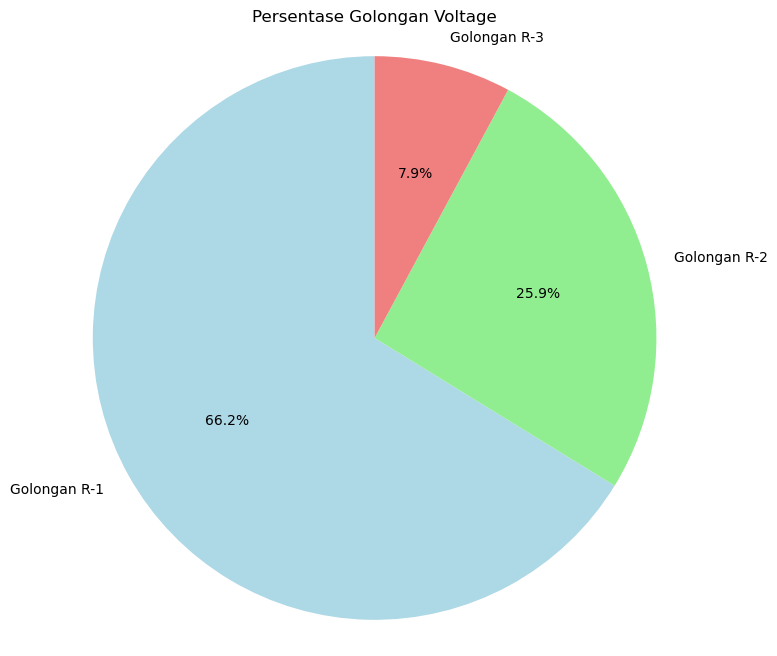

In [211]:
# membuat piechart sesuai instruksi soal
plt.figure(figsize=(8,8))
plt.pie(voltage_counts, labels=voltage_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','lightgreen','lightcoral'])
plt.title('Persentase Golongan Voltage')
plt.axis('equal');

Nah bisa kita lihat pada pie chart yang kita buat diatas. Sama seperti tadi, R-1 mendominasi dengan 66,2% dari data. Selebihnya diisi dengan golongan R-2 dan R-3.

Selanjutnya, kita akan mencari top 5 area yang memiliki rumah mewah terbanyak berdasarkan dataset. Menurut sebuah sumber, rumah mewah adalah rumah dengan building area minimal 300 m2.

In [212]:
# untuk melihat column building area
df['building_area']

0       272.0
1        69.0
2       131.0
3       174.0
4       196.0
        ...  
3029     36.0
3030     60.0
3031     60.0
3032     65.0
3033     60.0
Name: building_area, Length: 2851, dtype: float64

In [213]:
# membuat filter untuk rumah yang memiliki area >= 300 m2 
rumah_mewah = df[df['building_area'] >= 300]

# selanjtunya group by column area dan hitung jumlah rumah mewahnya
area_mewah = rumah_mewah.groupby('area').size()

# ambil top 5 nya saja
top_5_area = area_mewah.nlargest(5)

top_5_area



area
Sentul City           66
Pantai Indah Kapuk    33
Kemang                23
BSD                   19
Alam Sutera           14
dtype: int64

Diatas sudah tertera top 5 area dengan rumah mewah terbanyak. Kita dapatkan bahwa area dengan rumah mewah terbanyak ialah sentul city dengan 66 rumah dikuti dengan PIK, Kemang, BSD, dan juga yang terkahir Alam Sutera.

In [214]:
# next cari rata-rata tiap area
avg_mewah_per_area = rumah_mewah.groupby('area')['price'].mean()

# setelah itu kita gabungkan hasil jumlah rumah mewah dan rata-rata
top_5_price = pd.DataFrame({
    'jumlah_rumah_mewah': top_5_area,
    'rata_rata_harga': avg_mewah_per_area.reindex(top_5_area.index)
})

top_5_price

,jumlah_rumah_mewah,rata_rata_harga
area,,
Sentul City,66,1.021667e+10
Pantai Indah Kapuk,33,2.020606e+10
Kemang,23,2.140435e+10
BSD,19,1.420000e+10
Alam Sutera,14,1.078929e+10


Bisa kita lihat diatas, bahwa rata rata dari 66 rumah mewah yang ada di Sentul itu memiliki harga sekitar 10 miliar. Kita bisa lihat juga ternyata rata-rata harga rumah di Kemang lebih mahal dibandingkan Sentul, yang mana mencapai 21 miliar.

Next, kita akan melakukan satu test case dimana keluarga Bapak Slamet hendak mencari rumah. Karena keuangan mereka yang terbatas, mereka mengasumsikan bahwa rumah yang dibuat sebelum tahun 2000 akan jauh lebih murah harganya mengingat usia rumah yang sudah tua.

Pertama kita akan melakukan beberapa analisis untuk mengetahui apakah benar asumsi dari pak selamet bahwa rumah dibawah tahun 2000 lebih murah dibandingkan dengan tahun 2000 keatas.

In [215]:
# kita pisahkan rumah tahun 2000 keatas dan 2000 kebawah
dibawah_2000 = df[df['year'] < 2000]
keatas_2000 = df[df['year'] >= 2000]

# Langkah 2: Hitung rata-rata harga untuk kedua kategori
average_dibawah_2000 = dibawah_2000['price'].mean()
average_diatas_2000 = keatas_2000['price'].mean()

# Tampilkan hasil perbandingan harga
print(f"Rata-rata harga rumah sebelum tahun 2000: {average_dibawah_2000}")
print(f"Rata-rata harga rumah tahun 2000 atau setelahnya: {average_diatas_2000}")

Rata-rata harga rumah sebelum tahun 2000: 10905526315.789474
Rata-rata harga rumah tahun 2000 atau setelahnya: 3785341272.6626377


Dapat kita lihat, setelah analisis sederhana dengan membagi rumah yang tahun 2000 kebawah dan keatas. Didapatkan rata-rata harga rumah sebelum tahun 2000 berada diangka -+ 10 milliar, sedangkan harga rumah tahun 2000 dan setelahnya memiliki rata-rata -+ 3 milliar. 

Kita akan melanjutkan analisis kita dengan mencoba melihat rata-rata kondisi rumah tahun 2000 kebawah dan keatas untuk lebih melihat apakah harga murah dari rumah tahun 2000 keatas tadi didapat dari kondisinya yang kurang baik?

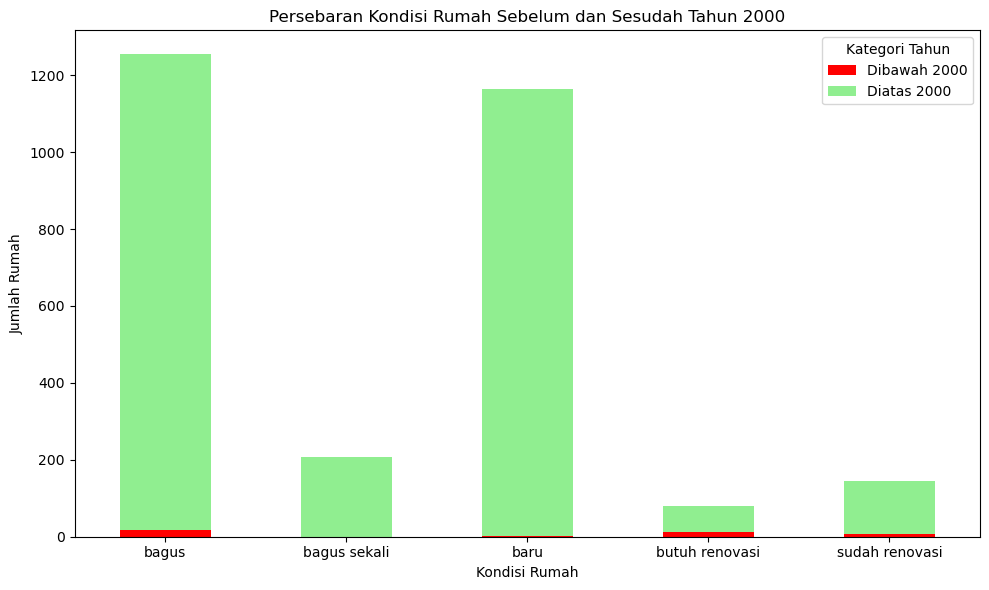

In [216]:
# Hitung distribusi kondisi rumah
kondisi_dibawah_2000 = dibawah_2000['condition'].value_counts()
kondisi_diatas_2000 = keatas_2000['condition'].value_counts()

# Gabungkan data untuk visualisasi
kondisi_combined = pd.DataFrame({
    'Dibawah 2000': kondisi_dibawah_2000,
    'Diatas 2000': kondisi_diatas_2000
}).fillna(0)

# Visualisasi dalam bentuk stacked bar chart
kondisi_combined.plot(kind='bar', stacked=True, color=['red', 'lightgreen'], figsize=(10,6))

plt.title('Persebaran Kondisi Rumah Sebelum dan Sesudah Tahun 2000')
plt.xlabel('Kondisi Rumah')
plt.ylabel('Jumlah Rumah')
plt.xticks(rotation=0)
plt.legend(title='Kategori Tahun')
plt.tight_layout()
plt.show()


Melihat dari stacked chart yang telah kita buat, perbandingan dapat terlihat dengan sangat jelas lebih banyak variasi rumah yang lebih baik kondisinya jika dibandingkan dengan kondisi rumah tahun 2000 kebawah. Dapat dilihat juga tidak ada rumah tahun 2000 kebawah dengan kondisi yang bagus sekali, kebanyakan butuh direnovasi dan juga kondisinya bagus saja.

In [217]:
# melihat angka dari masing-masing distribusi kondisi rumah
print("Distribusi Kondisi Rumah Sebelum Tahun 2000:")
print(kondisi_dibawah_2000)

print("\nDistribusi Kondisi Rumah Tahun 2000 atau Setelahnya:")
print(kondisi_diatas_2000)


Distribusi Kondisi Rumah Sebelum Tahun 2000:
condition
bagus             18
butuh renovasi    12
sudah renovasi     7
baru               1
Name: count, dtype: int64

Distribusi Kondisi Rumah Tahun 2000 atau Setelahnya:
condition
bagus             1236
baru              1163
bagus sekali       208
sudah renovasi     137
butuh renovasi      69
Name: count, dtype: int64


Setelah kita melihat angkanya, memang dari data perbadingan jumlah rumah tahun 2000 kebawah dan 2000 keatas sangat jauh. Akan tetapi dapat kita lihat kondisi rumah dibawah tahun 2000 cukup didominasi dengan kondisi butuh renovasi. Dimana rumah tahun 2000 keatas terdapat banyak sekali opsi rumah yang baru, bagus, dan bahkan bagus sekali.

**Conclusion**:

Asumsi dari pak selamet soal harga rumah dibawah tahun 2000 lebih murah dapat kita sanggah dengan analisis yang kita buat diatas. Didapatkan rata-rata rumah tahun 2000 keatas malah lebih murah dibandingkan dengan rumah dibawah tahun 2000. Selanjutnya, melihat dari sisi kondisi rumah dibawah tahun 2000 juga cukup banyak yang butuh direnovasi. Sedangkan, rumah dengan tahun 2000 keatas banyak sekali pilihan rumah yang sudah layak pakai. Jika saya boleh merekomendasikan, saya akan lebih memilih untuk mencari rumah yang rumah yang tahunya 2000 keatas. Dimana kita dapat lebih memilih antara rumah yang bagus, bagus sekali, hingga baru dengan harga yang lebih murah.

Selanjutnya, kita akan mencoba untuk mencari korelasi dari masing-masing column dengan column target kita yaitu price.

In [218]:
# Menghitung korelasi antara setiap kolom numerik dengan kolom 'price'
col_num = ['lattitude', 'logitude', 'bedrooms', 'bathrooms', 'land_area', 'building_age', 'year', 'garage', 'carport', 'voltage_VA']
for column in col_num:
    correlation = df[column].corr(df['price'])
    print(f'Korelasi antara {column} dan price: {correlation}')


Korelasi antara lattitude dan price: 0.09146738316800009
Korelasi antara logitude dan price: -0.05501454190929673
Korelasi antara bedrooms dan price: 0.19780387409133215
Korelasi antara bathrooms dan price: 0.22504984937898093
Korelasi antara land_area dan price: 0.30760619323331695
Korelasi antara building_age dan price: 0.11017318516916769
Korelasi antara year dan price: -0.11017318516916767
Korelasi antara garage dan price: 0.1254781682303346
Korelasi antara carport dan price: 0.03135753840223945
Korelasi antara voltage_VA dan price: 0.4293739405390752


Bisa kita lihat diatas latitude dan logitude memiliki korelasi rendah, dan juga kolom year memiliki korelasi negatif. Hal ini bisa saja menandakan kurangnya korelasi antara 3 column tersebut dengan peningkatan atau penurunan harga rumah

## 5. Feature Engineering

### 5.1 Feature Selection

Sekarang kita akan memilih column mana saja yang akan kita keep dan column mana saja yang akan kita drop

In [219]:
df

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,...,certificate,voltage,building_age,year,condition,garage,carport,price,voltage_VA,voltage_class
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,...,shm - sertifikat hak milik,4400 mah,5.0,2017,bagus,0,0,2.990000e+09,4400,Golongan R-2
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,...,hgb - hak guna bangunan,2200 mah,6.0,2016,bagus,0,1,1.270000e+09,2200,Golongan R-1
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,...,hgb - hak guna bangunan,2200 mah,1.0,2021,bagus,1,1,1.950000e+09,2200,Golongan R-1
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,...,shm - sertifikat hak milik,3500 mah,6.0,2016,bagus sekali,1,0,3.300000e+09,3500,Golongan R-2
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,...,shm - sertifikat hak milik,3500 mah,9.0,2013,bagus,1,1,4.500000e+09,3500,Golongan R-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,...,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,1,1,5.880000e+08,1300,Golongan R-1
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,...,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,0,1,7.850000e+08,1300,Golongan R-1
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,...,shm - sertifikat hak milik,1300 mah,0.0,2022,baru,0,1,7.550000e+08,1300,Golongan R-1
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,...,shm - sertifikat hak milik,2200 mah,0.0,2022,baru,0,1,8.000000e+08,2200,Golongan R-1


In [220]:
df['property_type'].unique()

array(['rumah'], dtype=object)

Ada beberapa column yang kemungkinan tidak kita pakai, hal ini terlihat pada property_type yang mana hanya memiliki 1 unique saja dan tidak ada bedanya. Selanjutnnya, pada column voltage dan voltage_va akan di drop salah satu dikarenakan dua column tersebut sebenarnya sama akan tetapi berbeda pada tipenye saja. Dan terakhir, kita lihat di EDA bahwa korealasi negatf antara column year dan column price maka dari itu kita coba drop juga.

In [221]:
df = df.drop(columns=['property_type', 'voltage', 'year'])
df

,area,city,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,building_age,condition,garage,carport,price,voltage_VA,voltage_class
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,5.0,bagus,0,0,2.990000e+09,4400,Golongan R-2
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,6.0,bagus,0,1,1.270000e+09,2200,Golongan R-1
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,1.0,bagus,1,1,1.950000e+09,2200,Golongan R-1
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,6.0,bagus sekali,1,0,3.300000e+09,3500,Golongan R-2
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,9.0,bagus,1,1,4.500000e+09,3500,Golongan R-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,2.0,1.0,72.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,1,1,5.880000e+08,1300,Golongan R-1
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,7.850000e+08,1300,Golongan R-1
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,3.0,2.0,78.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,7.550000e+08,1300,Golongan R-1
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,3.0,2.0,60.0,65.0,2.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,8.000000e+08,2200,Golongan R-1


Terlihat diatas kita udah memiliki column yang kita ingin pakai selanjutnya

### 5.2 Cek Cardinality

In [222]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,area,364,"[Summarecon Bekasi, Bekasi, Setu, Harapan Indah, Bekasi Kota, Cibitung, Cibubur, Mustikajaya, Jatisampurna, Jatiwarna, Pondok Gede, Jaka Setia, Jati Asih, Grand Wisata, Jatibening, Bekasi Utara, Rawalumbu, Tambun Selatan, Harapan Baru, Pondokmelati, Babelan, Kemang Pratama, Bekasi Timur, Jatiwaringin, Tarumajaya, Cikarang Selatan, Kebalen, Kayuringin Jaya, Bintara, Jatirangga, Cikarang, Jati Mekar, Duta Harapan, Jati Sari, Pejuang, Galaxy, Tanah Tinggi, Jaka Sampurna, Bekasi Barat, Tambun Utara, Kaliabang, Mustikasari, Cimuning, Caman, Cikunir, Satriajaya, Pondok Ungu, Pekayon, Harapan Mulya, Harapan Jaya, Perwira, Jatikramat, Jatimurni, Jatimelati, Karang Satria, Kranji, Margahayu, Serang Baru, Duren Jaya, Jati Luhur, Jababeka, Komsen, Jatiranggon, Narogong, Bantar Gebang, Jatimakmur, Jati Cempaka, Golden City, Pedurenan, Medan Satria, Pasirmulya, Cilendek Timur, Sentul City, Cileungsi, Kemang, Ciomas, Gunung Sindur, Bojong Gede, Kedung Halang, Tapos, Cibinong, Sentul, Sukaraja, Tanah Sareal, Ciparigi, Katulampa, Bogor Barat, Gunung Putri, Cilendek Barat, Tamansari, Kota Wisata, Bojongsari, Curug, Babakan Madang, Bojong, Cimahpar, Tanah Baru, Bogor Nirwana Residence, Tegallega, Parung Panjang, ...]"
1,city,9,"[ Bekasi, Bogor, Depok, Jakarta Barat, Jakarta Selatan, Jakarta Utara, Jakarta Timur, Jakarta Pusat, Tangerang]"
2,certificate,3,"[shm - sertifikat hak milik, hgb - hak guna bangunan, lainnya (ppjb,girik,adat,dll), nan]"
3,condition,5,"[bagus, bagus sekali, baru, sudah renovasi, butuh renovasi]"
4,voltage_class,3,"[Golongan R-2, Golongan R-1, Golongan R-3]"


Dapat dilihat diatas, kolom area memiliki tingkat cardinal yang tinggi. Dengan begitu hal ini harus kita coba handling.

Dalam analisa sederhana kita sebenarnya dapat melihat kalau column city merupakan pembagian region dari column area, dengan begitu handling cardinality ini dapat dilakukan dengan drop column area dan menggunakan city saja. Akan tetapi sebelum melakukan hal tersebut kita cek terlebih dahulu apakah column area memiliki korelasi dengan target kita yaitu column price.

Column area tidak bersifat ordinal (misalnya, "Summarecon Bekasi" tidak lebih besar atau kecil dari "Cibitung"), sehingga Kendall mungkin kurang tepat. Jadi pengujian kali ini kita menggunakan ANOVA

In [223]:
# Melakukan ANOVA dengan variabel area dan price
model = ols('price ~ C(area)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F        PR(>F)
C(area)   1.053460e+23   363.0  1.738622  4.140203e-14
Residual  4.151279e+23  2487.0       NaN           NaN


Hal yang bisa kita ambil dalam pengujian tersebut adalah dengan p-value yang sangat kecil (4.14e-14), hasil ini menunjukkan bahwa area memiliki pengaruh yang signifikan terhadap harga rumah. Artinya, rata-rata harga rumah bervariasi secara signifikan di berbagai area. Karena area memengaruhi harga rumah secara signifikan, kolom ini tidak boleh di-drop.

Akan tetapi, karena adanya kolom city yang sudah membagi area menjadi beberapa value saja, saya memutuskan untuk menggunakan column city saja. ;)

In [224]:
df = df.drop(columns=['area'])
df

,city,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,building_age,condition,garage,carport,price,voltage_VA,voltage_class
0,Bekasi,-6.223945,106.986275,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,5.0,bagus,0,0,2.990000e+09,4400,Golongan R-2
1,Bekasi,-6.223945,106.986275,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,6.0,bagus,0,1,1.270000e+09,2200,Golongan R-1
2,Bekasi,-6.223945,106.986275,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,1.0,bagus,1,1,1.950000e+09,2200,Golongan R-1
3,Bekasi,-6.223945,106.986275,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,6.0,bagus sekali,1,0,3.300000e+09,3500,Golongan R-2
4,Bekasi,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,9.0,bagus,1,1,4.500000e+09,3500,Golongan R-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Tangerang,-6.296615,106.704601,2.0,1.0,72.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,1,1,5.880000e+08,1300,Golongan R-1
3030,Tangerang,-6.283454,106.638775,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,7.850000e+08,1300,Golongan R-1
3031,Tangerang,-6.283454,106.638775,3.0,2.0,78.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,7.550000e+08,1300,Golongan R-1
3032,Tangerang,-6.288237,106.665859,3.0,2.0,60.0,65.0,2.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,8.000000e+08,2200,Golongan R-1


Kita cek lagi apakah masih ada yang perlu dihandling cardinal atau tidak.

In [225]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,city,9,"[ Bekasi, Bogor, Depok, Jakarta Barat, Jakarta Selatan, Jakarta Utara, Jakarta Timur, Jakarta Pusat, Tangerang]"
1,certificate,3,"[shm - sertifikat hak milik, hgb - hak guna bangunan, lainnya (ppjb,girik,adat,dll), nan]"
2,condition,5,"[bagus, bagus sekali, baru, sudah renovasi, butuh renovasi]"
3,voltage_class,3,"[Golongan R-2, Golongan R-1, Golongan R-3]"


Okeh udah terlihat cukup rendah tingkat cardinality dari tabel object yang kita punya.

### 5.3 Split Feature (X) dan Target (y)

Selanjutnya kita akan split antara target dan feature.

In [226]:
X = df.drop('price', axis=1)
y = df['price']

In [227]:
print("fitur:", X.shape)
print("target:",y.shape)

fitur: (2851, 17)
target: (2851,)


Diatas kita udah berhasil untuk ngesplit mana yang feature mana yang target, terlihat feature memiliki 17 column dari 18 column yang mana column terakhir tersebut merupakan target.

### 5.4 Split Train and Test

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=99)

Diatas kita membagi tabel menjadi bagian train dan test dimana ada fitur train dan fitur test, target train dan juga target test.

### 5.5 Handling Outliers

In [229]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,lattitude,-0.6,skewed
1,logitude,3.4,skewed
2,bedrooms,15.4,skewed
3,bathrooms,14.5,skewed
4,land_area,12.0,skewed
5,building_area,4.7,skewed
6,floors,0.4,normal
7,maid_bedrooms,1.6,skewed
8,maid_bathrooms,1.3,skewed
9,building_age,2.8,skewed


Terlihat dari column - column yang kita miliki, ada banyak ditribusi yang skewed.

In [230]:
# buat upper, lower boundries dan cek persentase outliersnya

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]

  #cek upper and lower boundary

  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()

  #append ke list

  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,

    #round the value

    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,lattitude,-5.75,-6.88,0.04
1,logitude,107.44,106.12,0.13
2,bedrooms,10.00,-4.00,0.44
3,bathrooms,6.00,-1.00,1.36
4,land_area,504.00,-252.00,6.27
5,building_area,611.00,-348.00,3.60
6,floors,3.62,-0.12,0.48
7,maid_bedrooms,4.00,-3.00,0.04
8,maid_bathrooms,4.00,-3.00,0.04
9,building_age,28.00,-21.00,0.75


kita dapat melihat diatas ada banyak column yang memilihi persentasi outliersnya, beberapa yang tampak besar adalah carport, voltage_va, land_area dan juga building area.

Untuk outliers yang cukup tinggi ini kita akan coba trimming. Ada 4 column yaitu carport, voltage_va, land_area dan juga building area. Kita akan melakukan trimming sesuai dengan ditribusi masing-masing column apakah skewed atau tidak. Yang mana pada kasus kita ini, keempat column tersebut merupakan skewed.

In [231]:

# function untuk menghapus outlier berdasarkan IQR pada data train
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Lakukan trimming pada X_train
columns_trim = ['carport', 'voltage_VA', 'land_area', 'building_area']

X_train_trimmed = X_train.copy()  # Buat salinan untuk menjaga data asli
for col in columns_trim:
    X_train_trimmed = remove_outliers_iqr(X_train_trimmed, col)

# Pastikan jumlah sampel pada y_train sesuai dengan X_train yang sudah di-trim
y_train_trimmed = y_train[X_train_trimmed.index]

X_train_trimmed


,city,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,building_age,condition,garage,carport,voltage_VA,voltage_class
1044,Bogor,-6.665544,106.748246,2.0,1.0,60.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,1300,Golongan R-1
1849,Jakarta Utara,-6.102478,106.741190,3.0,2.0,120.0,150.0,2.0,0.0,1.0,NaN,0.0,baru,0,1,4400,Golongan R-2
2878,Tangerang,-6.276190,106.629879,3.0,2.0,77.0,70.0,2.0,0.0,0.0,"lainnya (ppjb,girik,adat,dll)",2.0,bagus,0,1,4400,Golongan R-2
1322,Depok,-6.367494,106.874766,4.0,4.0,232.0,150.0,2.0,1.0,0.0,shm - sertifikat hak milik,3.0,bagus,0,1,2200,Golongan R-1
420,Bekasi,-6.217795,107.016014,4.0,2.0,95.0,150.0,2.0,0.0,0.0,shm - sertifikat hak milik,14.0,bagus,1,1,2200,Golongan R-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Bekasi,-6.358777,107.034833,2.0,1.0,72.0,36.0,1.0,0.0,0.0,hgb - hak guna bangunan,1.0,baru,0,1,1300,Golongan R-1
1198,Bogor,-6.646659,106.877985,2.0,1.0,50.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,4.0,baru,1,1,1300,Golongan R-1
1866,Jakarta Barat,-6.186638,106.742505,4.0,3.0,140.0,250.0,2.0,1.0,1.0,shm - sertifikat hak milik,9.0,bagus,0,1,4400,Golongan R-2
1316,Depok,-6.399113,106.799954,2.0,2.0,150.0,54.0,1.0,0.0,0.0,shm - sertifikat hak milik,0.0,bagus,1,1,1300,Golongan R-1


Setelah kita trimmed jumlah dari rows menjadi 1463.

In [232]:
#check distribution form skewness
num_cols = list(X_train_trimmed.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train_trimmed[col].skew(),1), np.where(
    (round(X_train_trimmed[col].skew(),1) <= 0.5) & (round(X_train_trimmed[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,lattitude,-0.5,normal
1,logitude,4.2,skewed
2,bedrooms,0.9,skewed
3,bathrooms,0.6,skewed
4,land_area,1.2,skewed
5,building_area,0.9,skewed
6,floors,0.2,normal
7,maid_bedrooms,1.0,skewed
8,maid_bathrooms,1.3,skewed
9,building_age,2.0,skewed


Oke setelah data kita trimm terlihat beberapa kolom sudah terdistribusi normal walaupun masih ada beberapa yang skewed, selanjutnya kita akan melihat apakah ada missing value.

### 5.6 Handling Missing Value

In [233]:
X_train_trimmed.isnull().sum()

city               0
lattitude          0
logitude           0
bedrooms           5
bathrooms          2
land_area          0
building_area      0
floors             0
maid_bedrooms      0
maid_bathrooms     0
certificate       44
building_age       0
condition          0
garage             0
carport            0
voltage_VA         0
voltage_class      0
dtype: int64

terlihat ada 3 kolom yang memiliki missing value, bathrooms, dan bathrooms. Kita akan coba handling.

In [234]:
# Mengisi missing values di kolom bedroom dan bathroom dengan 0
X_train_trimmed['bedrooms'].fillna(0, inplace=True)
X_train_trimmed['bathrooms'].fillna(0, inplace=True)

# Mengisi missing values di kolom certificate dengan "Tidak ada"
X_train_trimmed['certificate'].fillna("Tidak ada", inplace=True)

# Mengecek apakah masih ada missing values setelah pengisian
X_train_trimmed.isnull().sum()


C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_7768\4050360158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_trimmed['bedrooms'].fillna(0, inplace=True)
C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_7768\4050360158.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

city              0
lattitude         0
logitude          0
bedrooms          0
bathrooms         0
land_area         0
building_area     0
floors            0
maid_bedrooms     0
maid_bathrooms    0
certificate       0
building_age      0
condition         0
garage            0
carport           0
voltage_VA        0
voltage_class     0
dtype: int64

Alasan diubahnya missing value dari bedrooms dan bathromms karena diasumsikan bahwa di beberapa rumah memak tidak memiliki kamar dan juga beberapa tidak memeiliki kamar mandi. selanjutnya, untuk column certificate yang missing value di ganti dengan tidak ada karena beberapa rumah bisa saja memang tidak memiliki sertifikatnya atau hilang.

In [235]:
y_train_trimmed.isnull().sum()

0

In [236]:
X_test.isnull().sum()

city               0
lattitude          0
logitude           0
bedrooms           6
bathrooms          6
land_area          0
building_area      0
floors             0
maid_bedrooms      0
maid_bathrooms     0
certificate       21
building_age       0
condition          0
garage             0
carport            0
voltage_VA         0
voltage_class      0
dtype: int64

In [237]:
# Mengisi missing values di kolom bedroom dan bathroom dengan 0
X_test['bedrooms'].fillna(0, inplace=True)
X_test['bathrooms'].fillna(0, inplace=True)

# Mengisi missing values di kolom certificate dengan "Tidak ada"
X_test['certificate'].fillna("Tidak ada", inplace=True)

# Mengecek apakah masih ada missing values setelah pengisian
X_test.isnull().sum()

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_7768\571563833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['bedrooms'].fillna(0, inplace=True)
C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_7768\571563833.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

city              0
lattitude         0
logitude          0
bedrooms          0
bathrooms         0
land_area         0
building_area     0
floors            0
maid_bedrooms     0
maid_bathrooms    0
certificate       0
building_age      0
condition         0
garage            0
carport           0
voltage_VA        0
voltage_class     0
dtype: int64

In [238]:
y_test.isnull().sum()

0

Terlihat udah tidak ada missing value dari masing masing fiture dan target.

### 5.7 Split Categorical dan Numerical

In [239]:
X_train_trimmed

,city,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,building_age,condition,garage,carport,voltage_VA,voltage_class
1044,Bogor,-6.665544,106.748246,2.0,1.0,60.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,0.0,baru,0,1,1300,Golongan R-1
1849,Jakarta Utara,-6.102478,106.741190,3.0,2.0,120.0,150.0,2.0,0.0,1.0,Tidak ada,0.0,baru,0,1,4400,Golongan R-2
2878,Tangerang,-6.276190,106.629879,3.0,2.0,77.0,70.0,2.0,0.0,0.0,"lainnya (ppjb,girik,adat,dll)",2.0,bagus,0,1,4400,Golongan R-2
1322,Depok,-6.367494,106.874766,4.0,4.0,232.0,150.0,2.0,1.0,0.0,shm - sertifikat hak milik,3.0,bagus,0,1,2200,Golongan R-1
420,Bekasi,-6.217795,107.016014,4.0,2.0,95.0,150.0,2.0,0.0,0.0,shm - sertifikat hak milik,14.0,bagus,1,1,2200,Golongan R-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Bekasi,-6.358777,107.034833,2.0,1.0,72.0,36.0,1.0,0.0,0.0,hgb - hak guna bangunan,1.0,baru,0,1,1300,Golongan R-1
1198,Bogor,-6.646659,106.877985,2.0,1.0,50.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,4.0,baru,1,1,1300,Golongan R-1
1866,Jakarta Barat,-6.186638,106.742505,4.0,3.0,140.0,250.0,2.0,1.0,1.0,shm - sertifikat hak milik,9.0,bagus,0,1,4400,Golongan R-2
1316,Depok,-6.399113,106.799954,2.0,2.0,150.0,54.0,1.0,0.0,0.0,shm - sertifikat hak milik,0.0,bagus,1,1,1300,Golongan R-1


In [240]:
num_col = ['lattitude', 'logitude', 'bedrooms', 'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms', 'maid_bathrooms', 'building_age', 'garage', 'carport', 'voltage_VA']
cat_col_o = ['voltage_class', 'condition']
cat_col_n = ['city', 'certificate']

Diatas kita telah membagi column mana saja yang termasuk numerical dan juga categorical, yang mana categorical dibagai menjadi dua lagi yaitu ordinal dan nominal.

In [241]:
X_train_num = X_train_trimmed[num_col]
X_test_num = X_test[num_col]

X_train_cat_o = X_train_trimmed[cat_col_o]
X_test_cat_o = X_test[cat_col_o]

X_train_cat_n = X_train_trimmed[cat_col_n]
X_test_cat_n = X_test[cat_col_n]

Lalu kita masukkan yang telah dibagi tersebut kedalam sebuah variabel.

In [242]:
X_train_num

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,building_age,garage,carport,voltage_VA
1044,-6.665544,106.748246,2.0,1.0,60.0,36.0,1.0,0.0,0.0,0.0,0,1,1300
1849,-6.102478,106.741190,3.0,2.0,120.0,150.0,2.0,0.0,1.0,0.0,0,1,4400
2878,-6.276190,106.629879,3.0,2.0,77.0,70.0,2.0,0.0,0.0,2.0,0,1,4400
1322,-6.367494,106.874766,4.0,4.0,232.0,150.0,2.0,1.0,0.0,3.0,0,1,2200
420,-6.217795,107.016014,4.0,2.0,95.0,150.0,2.0,0.0,0.0,14.0,1,1,2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-6.358777,107.034833,2.0,1.0,72.0,36.0,1.0,0.0,0.0,1.0,0,1,1300
1198,-6.646659,106.877985,2.0,1.0,50.0,36.0,1.0,0.0,0.0,4.0,1,1,1300
1866,-6.186638,106.742505,4.0,3.0,140.0,250.0,2.0,1.0,1.0,9.0,0,1,4400
1316,-6.399113,106.799954,2.0,2.0,150.0,54.0,1.0,0.0,0.0,0.0,1,1,1300


Bisa kita lihat sudah terbagi menjadi 6 variabel.


### 5.8 Feature Scaling

Kita maksud kepada bagian scaling dimana kita akan melakukan scaling pada data train dan data test yang numeric. Kita menggunakan MinMax scaler dikarenakan data yang kita miliki banyak yang skewed tapi outliernya sudah kita coba handing tadi, dan kebanyakan sudah tidak memiliki outliernya. Dengan begitu kita bisa memakai MinMax Scaler.

In [243]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

Kita lakukan fit kepada x_train saja.

In [244]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Diatas kita lalukan transform untuk x_test nya juga.

In [245]:
X_train_num.head(1)

,lattitude,logitude,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,building_age,garage,carport,voltage_VA
1044,-6.665544,106.748246,2.0,1.0,60.0,36.0,1.0,0.0,0.0,0.0,0,1,1300


In [246]:
X_train_num_scaled[0]

array([0.28937268, 0.08454688, 0.28571429, 0.14285714, 0.2       ,
       0.07438017, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21518987])

Bisa dilihat diatas X_train udah berbentuk array.

### 5.9 Feature Encoding

Next, kita akan encoding data yang categorical menjadi angka juga agar bisa dibaca oleh sistem.

#### - Ordinal

In [247]:
X_train_cat_o

,voltage_class,condition
1044,Golongan R-1,baru
1849,Golongan R-2,baru
2878,Golongan R-2,bagus
1322,Golongan R-1,bagus
420,Golongan R-1,bagus
...,...,...
60,Golongan R-1,baru
1198,Golongan R-1,baru
1866,Golongan R-2,bagus
1316,Golongan R-1,bagus


Terdapat dua colomn ordinal dari data yang kita miliki.

In [248]:
print(X_train_cat_o['voltage_class'].unique())
print(X_train_cat_o['condition'].unique())

['Golongan R-1' 'Golongan R-2']
['baru' 'bagus' 'sudah renovasi' 'butuh renovasi' 'bagus sekali']


Kita bisa liat diatas unique value dari masing-masing column ordinal.

In [249]:
encoder_o = OrdinalEncoder(categories=[['Golongan R-1', 'Golongan R-2', 'Golongan R-3'],["butuh renovasi", 'baru', 'sudah renovasi', 'bagus', 'bagus sekali']])
encoder_o.fit(X_train_cat_o)

OrdinalEncoder(categories=[['Golongan R-1', 'Golongan R-2', 'Golongan R-3'],
                           ['butuh renovasi', 'baru', 'sudah renovasi', 'bagus',
                            'bagus sekali']])

Kita masukkan sesuai urutan dari ordinalnya untuk di encode menjadi angka. Kita menggunakan ordinal encoder sesuai dengan tipe dari data categoricalnya.

In [250]:
X_train_encoded_o = encoder_o.transform(X_train_cat_o)
X_test_encoded_o = encoder_o.transform(X_test_cat_o)

Lalu yang terakhir kita transform.

#### - Nominal

Selanjutnya sama seperti diatas, kita encode data kategorical akan tetapi kali ini menggunakan data nominal. Untuk data nomila kita menggunakan OneHot Encoder.

In [251]:
encoder_n = OneHotEncoder()
encoder_n.fit(X_train_cat_n)

OneHotEncoder()

In [252]:
X_train_encoded_n = encoder_n.transform(X_train_cat_n).toarray()
X_test_encoded_n = encoder_n.transform(X_test_cat_n).toarray()

Sama seperti sebelumnya, kita masukkan ke variabel untuk fitur yang sudah di transform.

### 5.10 Merge (Concat) Data

In [253]:
X_train_final = np.concatenate(
    [X_train_num_scaled, X_train_encoded_o, X_train_encoded_n], axis=1)
X_test_final = np.concatenate(
    [X_test_num_scaled, X_test_encoded_o, X_test_encoded_n], axis=1)

Pada bagian ini kita satuin semua yang udah kita scaling dan encoding diatas menjadi satu variabel.

In [254]:
X_train_final[0]

array([0.28937268, 0.08454688, 0.28571429, 0.14285714, 0.2       ,
       0.07438017, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21518987, 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

Sekarang kita sudah dapat fitur yang final hasil penggabungan dari 4 variabel scaling dan encoding tadi dalam bentuk array.

## 6. Model Definition

Kita akan membuat dua model yang akan kita tentukan nantinya lebih baik pakai apa.

In [255]:
model_lin = LinearRegression()

In [256]:
model_lasso = Lasso()

## 7. Model Training

Disini kita akan melatih model yang telah kita buat tadi.

In [257]:
model_lin.fit(X_train_final, y_train_trimmed)

LinearRegression()

In [258]:
model_lasso.fit(X_train_final, y_train_trimmed)

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.995e+19, tolerance: 2.018e+17
  model = cd_fast.enet_coordinate_descent(


Lasso()

## 8. Model Evaluation

Pertama kita lakukan evaluasi untuk model linear regression.

In [259]:
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

print("MAE Train : ", mean_absolute_error(y_pred_train,y_train_trimmed))
print("MAE Test : ", mean_absolute_error(y_pred_test,y_test))
print("R2 Train : ", r2_score(y_pred_train,y_train_trimmed))
print("R2 Test : ", r2_score(y_pred_test,y_test))

MAE Train :  372130607.52611494
MAE Test :  1384091859.407035
R2 Train :  0.6578827216331544
R2 Test :  -0.379148227556497


Insight: 
- MAE di data testing jauh lebih tinggi daripada MAE di data training, dan R2 Score pada data testing sangat rendah (negatif), yang menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik pada data testing.
- Meskipun R2 Score di data training menunjukkan model bisa menjelaskan sekitar 65.8% dari variansi, performa di data testing dengan R2 Score negatif menunjukkan model mungkin tidak menangkap pola yang relevan di data testing.

Kelebihan dari Linear Regression:
- Model sederhana dan memberikan koefisien yang mudah diinterpretasikan.

Kelemahannya: 
- Sensitif Terhadap Overfitting
- Kemungkinan Underfitting

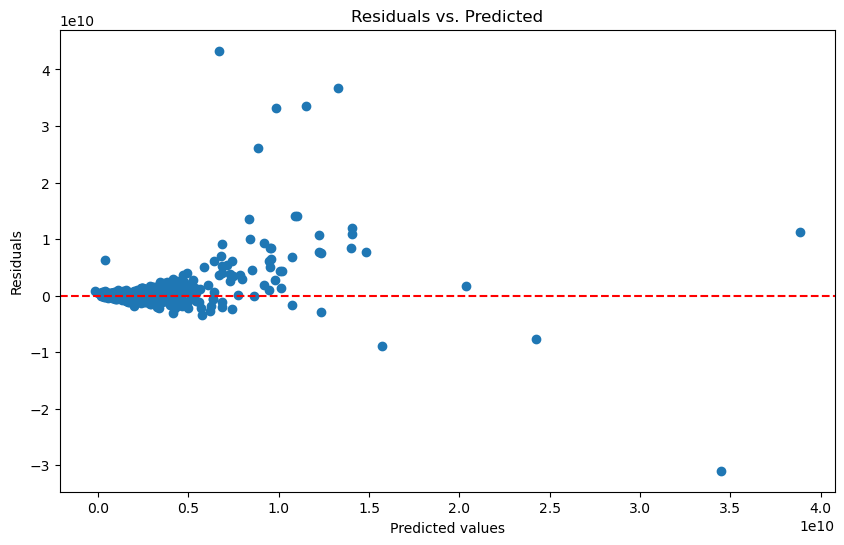

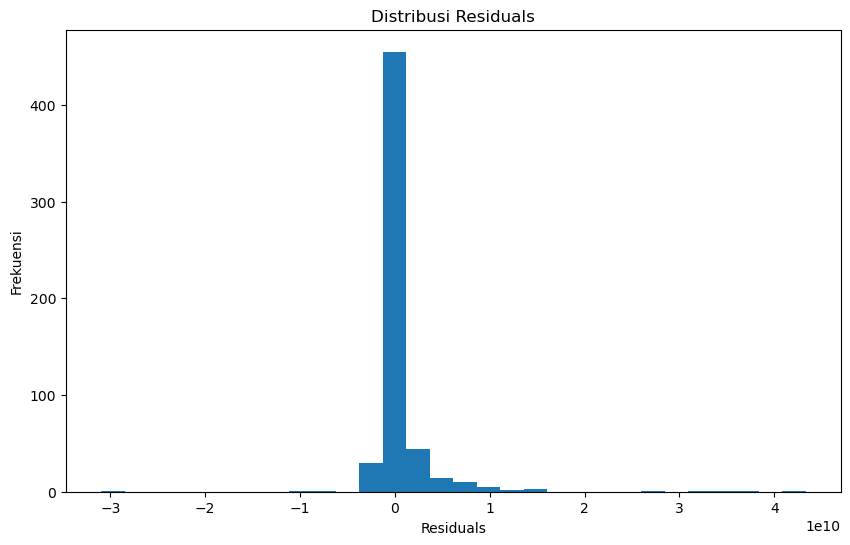

In [260]:
# Cek distribusi residual
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Plot distribusi residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title('Distribusi Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.show()

Bisa dilihat dari visualisasi yang kita lakukan diatas, residuals tidak tersebar secara acak dan menunjukkan pola tertentu, ini menunjukkan bahwa model tidak dapat menangkap hubungan non-linear. Juga, distribusi residuals yang tidak normal atau deviasi besar menunjukkan adanya masalah dengan model.

Selanjutnya kita melakukan evaluasi terhadap Model Lasso

In [261]:
# menyimpan hasil evaluasi kedalam dictionary
eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

# membuat fuction untuk evaluasi model
def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation dengan metrics berbeda-beda
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

  r2score_train = r2_score(y_train, y_pred_train)
  r2score_test = r2_score(y_test, y_pred_test)

  # masukkan ke dictionary
  eval_results['name'].append(name)
  eval_results['MAE - Train'].append(round(mae_train, 5))
  eval_results['MAE - Test'].append(round(mae_test, 5))
  eval_results['MSE - Train'].append(round(mse_train, 5))
  eval_results['MSE - Test'].append(round(mse_test, 5))
  eval_results['RMSE - Train'].append(round(rmse_train, 5))
  eval_results['RMSE - Test'].append(round(rmse_test, 5))
  eval_results['R2 Score - Train'].append(round(r2score_train, 5))
  eval_results['R2 Score - Test'].append(round(r2score_test, 5))

In [262]:
model_lasso_alpha_01 = Lasso(alpha=0.01)
model_lasso_alpha_01.fit(X_train_final, y_train_trimmed)

# Evaluate the model
model_evaluation('Lasso with alpha=0.01', model_lasso_alpha_01, X_train_final, X_test_final, y_train_trimmed, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.994e+19, tolerance: 2.018e+17
  model = cd_fast.enet_coordinate_descent(
c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Lasso with alpha=0.01
MAE - Train,3.721306e+08
MAE - Test,1.384092e+09
MSE - Train,3.515705e+17
MSE - Test,1.732512e+19
RMSE - Train,5.929338e+08
RMSE - Test,4.162345e+09
R2 Score - Train,7.450900e-01
R2 Score - Test,5.294400e-01


Insight: 

- MAE di data training lebih rendah dibandingkan dengan MAE di data testing. Ini menunjukkan bahwa model Lasso memberikan hasil yang lebih baik di data training dibandingkan data testing, yang menunjukkan kemungkinan adanya overfitting. Model mampu memprediksi nilai target dengan lebih akurat pada data yang sudah dilatih, tetapi performa menurun pada data yang tidak dilatih.

- MSE juga menunjukkan bahwa model lebih baik pada data training dibandingkan data testing. Perbedaan signifikan antara MSE di data training dan testing menandakan bahwa model mungkin terlalu overfit pada data training.

- RMSE di data testing jauh lebih tinggi dibandingkan dengan RMSE di data training. Model lebih baik dalam memprediksi data training, tetapi tidak dapat melakukan prediksi yang akurat pada data yang tidak dilatih.

- R2 score yang tinggi pada data training. Model mampu menjelaskan sekitar 74.5% variansi pada data training. Namun, R2 score di data testing (0.529) jauh lebih rendah, hanya sekitar 52.9%, menunjukkan bahwa model kurang mampu menjelaskan variansi pada data testing. Ini juga bisa menunjukkan adanya overfitting.

## 9. Model Analysis

Dari yang telah kita lakukan diatas model lasso hanya dapat memprediksi sekitar 53% saja. Hal ini mungkin dapat diperbaiki kedepannya sehingga dapat mengurangi adanya kemungkinan overfitting.

## 10. Model Saving

Kita save semua yang telah kita lakukan mulai dari list column nya, encoder, scaler, dan juga modelnya.

In [263]:
with open('model_lasso.pkl','wb') as file_1:
  pickle.dump(model_lasso, file_1)

with open('model_scaler.pkl','wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder_o.pkl','wb') as file_3:
  pickle.dump(encoder_o, file_3)

with open('model_encoder_n.pkl','wb') as file_4:
  pickle.dump(encoder_n, file_4)

with open('list_num_column.txt','wb') as file_5:
  pickle.dump(num_col, file_5)

with open('list_cat_col_o.txt','wb') as file_6:
  pickle.dump(cat_col_o, file_6)

with open('list_cat_col_n.txt','wb') as file_7:
  pickle.dump(cat_col_n, file_7)

## 11. Kesimpulan

Point-point penting yang dapat diambil dari pembuatan machine learning diatas:
- Bagian EDA:
    - kita telah menambahkan sebuah kolom yang menggolongkan voltage, dimana ternyata voltage tertinggi berada digolongan R-1,
    - Kita juga telah mencari top 5 rumah mewah, dan yang didapatkan rata-rata tertinggi berada pada area Sentul City,
    - Pada test case keluarga pak selamet didapatkan analisis bahwa rumah tahun 2000 keatas lebih murah dan juga memiliki kondisi lebih baik sehingga lebih disarankan untuk membeli rumah yang diatas tahun 2000 saja.
    - Setelah itu kita melakukan pengecekan korelasi antar kolom dengan target kita, didapatkan latitude dan logitude memiliki korelasi rendah, dan juga kolom year memiliki korelasi negatif. Menandakan kurangnya korelasi antara 3 column tersebut dengan peningkatan atau penurunan harga rumah.

- Bagian Model Evaluation:
    - Model Linear Regression kurang cocok dengan data yang kita miliki, karena data masih tidak terdistribusi normal dan juga masih ada beberapa outlier. sehingga saat ditest memakai model linear regression nilai r2 scorenya sangat rendah.
    - Setelah kita coba pada model lasso juga sama, kemungkinan terdapat data noise sehingga model menjadi overfitting
- Improvement:
    - mungkin dapat lebih memilah pada feature selection sehingga data yang train dapat sepenuhnya terambil polanya sehingga model dapat memprediksi lebih akurat.
    - dilakukan tuning model pada parameter alpha untuk mengurahi overfitting.
    - analisis model lebih banyak seperti Ridge Regression dan Elastic Net.